In [3]:
import re
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter

In [1]:
!pip install jovian --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 691.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 2.5 MB/s eta 0:00:00


In [ ]:
\b(?:[A-Z][a-z]*\.?\s*)+
\d{2})\s-\s([\w\s.]+?):\s(.*)'

In [88]:
import re
import pandas as pd

def whatsappToDf(file):
    with open(file, 'r') as raw_data:
        raw_string = raw_data.read()


        # Combined pattern
        pattern = r'(\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2})\s-\s([^:]+):\s(.*)'

        # matches = re.findall(combined_pattern, text)


        # pattern = rf'{datetime_pattern}|{name_pattern}'

        # Initialize lists to store data
        timestamps = []
        usernames = []
        messages = []

        # Find all matches in the raw string
        matches = re.findall(pattern, raw_string)

        # Extract data into lists
        for match in matches:
            timestamps.append(match[0])
            usernames.append(match[1])
            messages.append(match[2])

        # Create DataFrame
        df = pd.DataFrame({
            'timestamp': timestamps,
            'user': usernames,
            'message': messages
        })

        # Convert timestamp column to datetime format, handling potential format variations
        try:
            df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%m/%y, %H:%M')
        except ValueError:
            # Handle cases where the format doesn't match exactly
            df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

    return df


In [111]:
from collections import Counter


In [89]:
df = whatsappToDf('/content/WhatsApp.txt')

<ipython-input-88-eb0ab9137e95>:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


In [90]:
df

,timestamp,user,message
0,2024-03-22 23:33:00,Op Karan😅,null
1,2024-03-22 23:34:00,Riya,null
2,2024-03-22 23:35:00,Riya,null
3,2024-03-26 02:35:00,Riya,null
4,2024-03-31 23:17:00,Riya,null
...,...,...,...
534,2024-06-30 20:21:00,Op Karan😅,😂
535,2024-06-30 20:22:00,Op Karan😅,Pakistan chalte apne beto se mil kar aaye ge
536,2024-06-30 20:22:00,Op Karan😅,🤧
537,2024-06-30 20:22:00,.,<Media omitted>


In [17]:
df.head()

,timestamp,user,message
0,2024-03-22 23:34:00,Riya,null
1,2024-03-22 23:35:00,Riya,null
2,2024-03-26 02:35:00,Riya,null
3,2024-03-31 23:17:00,Riya,null
4,2024-04-01 22:02:00,saurabh Bhai,null


In [18]:
df.tail()

,timestamp,user,message
240,2024-06-30 20:20:00,Nandal Kr,Ha dikh raha
241,2024-06-30 20:20:00,Riya,Family thi
242,2024-06-30 20:21:00,Riya,🙂
243,2024-06-30 20:21:00,Riya,Hm
244,2024-06-30 20:24:00,Riya,Ghumney jaana hai na blast honey


In [19]:
df.shape

(245, 3)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  245 non-null    datetime64[ns]
 1   user       245 non-null    object        
 2   message    245 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 5.9+ KB


In [91]:
df['user'].value_counts()

user
Op Karan😅       240
Riya            131
saurabh Bhai     76
.                54
Nandal Kr        38
Name: count, dtype: int64

In [94]:
# Rename columns
df = df.rename(columns={
    'Op Karan😅': 'Karan',
    'Riya': 'Riya',
    'saurabh Bhai': 'Saurabh',
    '.': 'Mausham',
    'Nandal Kr': 'Nandal'
})

# Print updated DataFrame
print("\nUpdated DataFrame:")
print(df)



Updated DataFrame:
              timestamp       user  \
0   2024-03-22 23:33:00  Op Karan😅   
1   2024-03-22 23:34:00       Riya   
2   2024-03-22 23:35:00       Riya   
3   2024-03-26 02:35:00       Riya   
4   2024-03-31 23:17:00       Riya   
..                  ...        ...   
534 2024-06-30 20:21:00  Op Karan😅   
535 2024-06-30 20:22:00  Op Karan😅   
536 2024-06-30 20:22:00  Op Karan😅   
537 2024-06-30 20:22:00          .   
538 2024-06-30 20:24:00       Riya   

                                          message  
0                                            null  
1                                            null  
2                                            null  
3                                            null  
4                                            null  
..                                            ...  
534                                             😂  
535  Pakistan chalte apne beto se mil kar aaye ge  
536                                             🤧  
537

In [101]:
data = df[df['message'] != 'null']


In [102]:
data

,timestamp,user,message
20,2024-05-23 22:31:00,Op Karan😅,2544928
25,2024-06-25 18:40:00,Op Karan😅,Bhabhi mining ⛏️
26,2024-06-25 18:47:00,Riya,Hn kr liye
27,2024-06-25 21:59:00,.,..
28,2024-06-25 21:59:00,Op Karan😅,.
...,...,...,...
534,2024-06-30 20:21:00,Op Karan😅,😂
535,2024-06-30 20:22:00,Op Karan😅,Pakistan chalte apne beto se mil kar aaye ge
536,2024-06-30 20:22:00,Op Karan😅,🤧
537,2024-06-30 20:22:00,.,<Media omitted>


In [104]:
df.groupby('user')['timestamp'].agg(['count']).sort_values(by='count', ascending=False)

,count
user,
Op Karan😅,240
Riya,131
saurabh Bhai,76
.,54
Nandal Kr,38


## Q 2) Count of all the emojis that i have used?

In [115]:
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.EMOJI_DATA.keys())

# Create a regex pattern to match emojis
r = re.compile('|'.join(re.escape(p) for p in emojis_list))

# Iterate through the DataFrame and count emojis in the 'message' column
for idx, row in df.iterrows():
    if row["user"] == 'Op Karan😅':
        found_emojis = r.findall(row["message"])
        emoji_ctr.update(found_emojis)

print(emoji_ctr)


Counter({'😅': 6, '😂': 6, '\U0001f979': 4, '🥲': 3, '🤧': 3, '😬': 2, '\U0001fae1': 2, '🙂': 2, '⛏️': 1, '😑': 1, '💩': 1, '🙂\u200d↔': 1, '☠️': 1, '🙄': 1, '👍': 1})


In [116]:
for item in emoji_ctr.most_common(10):
    print(item[0] + " - " + str(item[1]))

😅 - 6
😂 - 6
🥹 - 4
🥲 - 3
🤧 - 3
😬 - 2
🫡 - 2
🙂 - 2
⛏️ - 1
😑 - 1


In [118]:
df['user'].unique()

array(['Op Karan😅', 'Riya', 'saurabh Bhai', '.', 'Nandal Kr'],
      dtype=object)

In [119]:
user_emoji_counters = {user: Counter() for user in df['user'].unique()}

# Get the list of emojis
emojis_list = map(lambda x: ''.join(x.split()), emoji.EMOJI_DATA.keys())

# Create a regex pattern to match emojis
r = re.compile('|'.join(re.escape(p) for p in emojis_list))

# Iterate through the DataFrame and count emojis in the 'message' column for each user
for idx, row in df.iterrows():
    found_emojis = r.findall(row["message"])
    user_emoji_counters[row["user"]].update(found_emojis)

# Print emoji counters for each user
for user, counter in user_emoji_counters.items():
    print(f"{user}: {counter}")

Op Karan😅: Counter({'😅': 6, '😂': 6, '\U0001f979': 4, '🥲': 3, '🤧': 3, '😬': 2, '\U0001fae1': 2, '🙂': 2, '⛏️': 1, '😑': 1, '💩': 1, '🙂\u200d↔': 1, '☠️': 1, '🙄': 1, '👍': 1})
Riya: Counter({'🙂': 4, '🙃': 4, '😌': 2, '🎀': 2, '😂': 2, '😶': 2, '😄': 2, '😅': 2, '🌚': 1, '😒': 1, '\U0001f979': 1, '😮\u200d💨': 1, '🤝': 1, '🥱': 1})
saurabh Bhai: Counter({'😎': 4, '🥲': 2, '😁': 2, '😥': 2, '🌹': 1})
.: Counter({'🌚': 1, '🍕': 1, '😁': 1, '🙂': 1})
Nandal Kr: Counter({'\U0001f979': 2, '🙃': 1, '😅': 1, '🙂': 1})


In [123]:
user_emoji_counters


{'Op Karan😅': Counter({'⛏️': 1,
          '😑': 1,
          '😬': 2,
          '\U0001fae1': 2,
          '\U0001f979': 4,
          '🥲': 3,
          '💩': 1,
          '🙂\u200d↔': 1,
          '😅': 6,
          '😂': 6,
          '☠️': 1,
          '🤧': 3,
          '🙂': 2,
          '🙄': 1,
          '👍': 1}),
 'Riya': Counter({'🙂': 4,
          '🙃': 4,
          '😌': 2,
          '🌚': 1,
          '🎀': 2,
          '😂': 2,
          '😒': 1,
          '😶': 2,
          '😄': 2,
          '\U0001f979': 1,
          '😮\u200d💨': 1,
          '🤝': 1,
          '😅': 2,
          '🥱': 1}),
 'saurabh Bhai': Counter({'😎': 4, '🥲': 2, '😁': 2, '😥': 2, '🌹': 1}),
 '.': Counter({'🌚': 1, '🍕': 1, '😁': 1, '🙂': 1}),
 'Nandal Kr': Counter({'\U0001f979': 2, '🙃': 1, '😅': 1, '🙂': 1})}

## Q 3) What can my activity say about my sleep cycle?

In [131]:
# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%y, %H:%M')

# Extract the hour
df['hour'] = df['timestamp'].dt.hour



In [132]:
df

,timestamp,user,message,hour
0,2024-03-22 23:33:00,Op Karan😅,null,23
1,2024-03-22 23:34:00,Riya,null,23
2,2024-03-22 23:35:00,Riya,null,23
3,2024-03-26 02:35:00,Riya,null,2
4,2024-03-31 23:17:00,Riya,null,23
...,...,...,...,...
534,2024-06-30 20:21:00,Op Karan😅,😂,20
535,2024-06-30 20:22:00,Op Karan😅,Pakistan chalte apne beto se mil kar aaye ge,20
536,2024-06-30 20:22:00,Op Karan😅,🤧,20
537,2024-06-30 20:22:00,.,<Media omitted>,20


<Axes: xlabel='hour'>

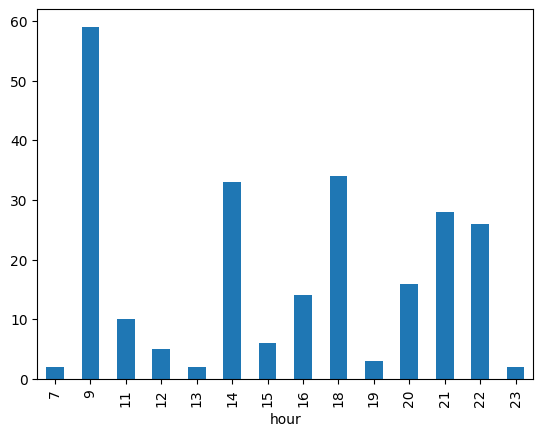

In [134]:
df['hour'] = df['timestamp'].apply(lambda x: x.hour)
df[df['user']=='Op Karan😅'].groupby(['hour']).size().sort_index().plot(x="hour", kind='bar')

<Axes: xlabel='hour'>

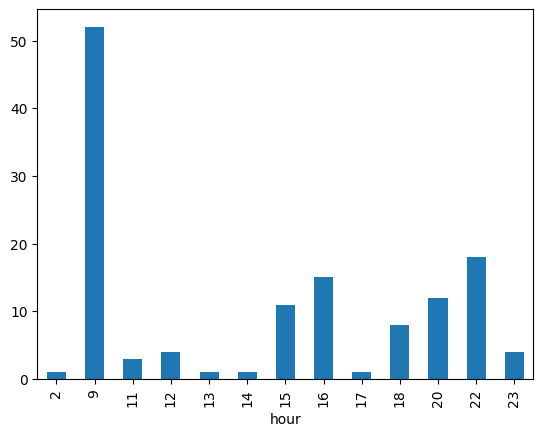

In [137]:
df['hour'] = df['timestamp'].apply(lambda x: x.hour)
df[df['user']=='Riya'].groupby(['hour']).size().sort_index().plot(x="hour", kind='bar')

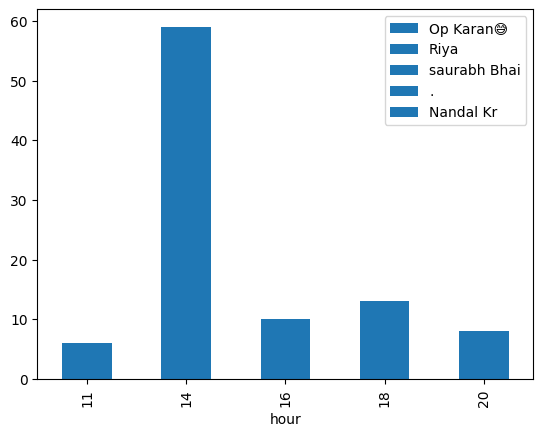

In [135]:
df['hour'] = df['timestamp'].apply(lambda x: x.hour)
for i in df['user'].unique():
    df[df['user']==i].groupby(['hour']).size().sort_index().plot(x="hour", kind='bar', label=i)
plt.legend()


<Axes: xlabel='hour'>

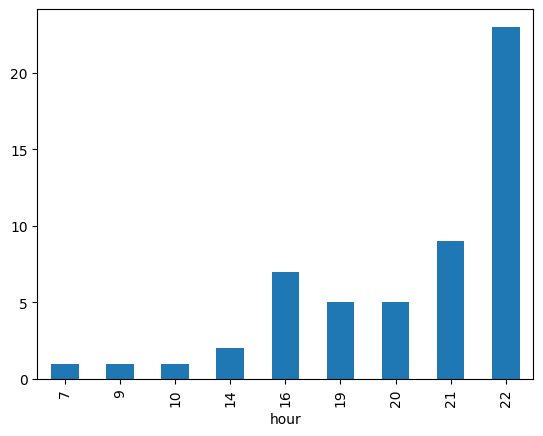

In [136]:
df['hour'] = df['timestamp'].apply(lambda x: x.hour)
df[df['user']=='.'].groupby(['hour']).size().sort_index().plot(x="hour", kind='bar')

In [138]:
df['weekday'] = df['timestamp'].dt.day

In [139]:
df['weekday'] = df['timestamp'].apply(lambda x: x.day_name()) # can use day_name or weekday from datetime

In [141]:
df['is_weekend'] = df.weekday.isin(['Sunday', 'Saturday'])

In [142]:
msgs_per_user = df['user'].value_counts(sort=True)
msgs_per_user

user
Op Karan😅       240
Riya            131
saurabh Bhai     76
.                54
Nandal Kr        38
Name: count, dtype: int64

In [143]:
comment_words = ' '
stopwords = STOPWORDS.update(['lo', 'ge', 'Lo', 'illa', 'yea', 'ella', 'en', 'na', 'En', 'yeah', 'alli', 'ide', 'okay', 'ok', 'will'])

for val in df.message.values:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    for words in tokens:
        comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

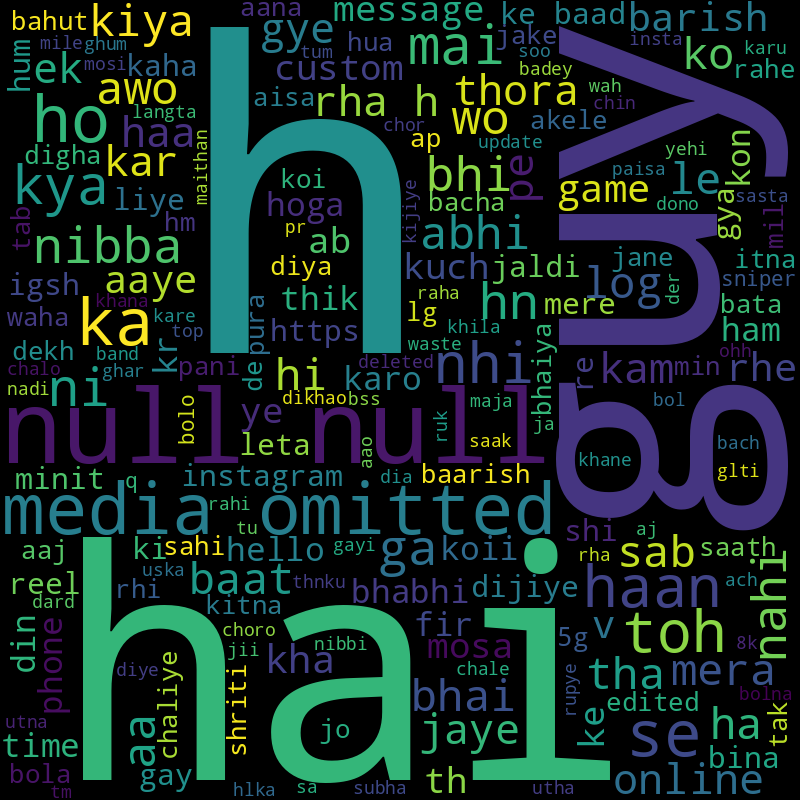

In [144]:
wordcloud.to_image()